In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd "/content/gdrive/My Drive/cs189_hw/cs189_hw1/hw1/scripts"

/content/gdrive/My Drive/cs189_hw/cs189_hw1/hw1/scripts


In [4]:
!python load.py


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
# 2 Data Partitioning
# 2(a) For the MNIST dataset, set aside 10,000 training images as a validation set
MNIST = np.load("/content/gdrive/My Drive/cs189_hw/cs189_hw1/hw1/data/mnist-data.npz")

shuffler = np.random.RandomState(seed=7777777).permutation(60000)
training_indices = list(range(0, 50000))
validation_indices = list(range(50000, 60000))

MNIST_data = {'training': MNIST["training_data"][shuffler][training_indices], 
              'validation': MNIST["training_data"][shuffler][validation_indices]}
MNIST_labels = {'training': MNIST["training_labels"][shuffler][training_indices], 
                'validation': MNIST["training_labels"][shuffler][validation_indices]}

In [7]:
# 2(b) For the spam dataset, set aside 20% of the training data as a validation set
spam = np.load("/content/gdrive/My Drive/cs189_hw/cs189_hw1/hw1/data/spam-data.npz")

shuffler = np.random.RandomState(seed=7777777).permutation(4172)
training_indices = list(range(0, round(4172*0.8)))
validation_indices = list(range(round(4172*0.8), 4172))

spam_data = {'training': spam["training_data"][shuffler][training_indices], 
              'validation': spam["training_data"][shuffler][validation_indices]}
spam_labels = {'training': spam["training_labels"][shuffler][training_indices], 
                'validation': spam["training_labels"][shuffler][validation_indices]}

In [8]:
# 2(c) For the CIFAR-10 dataset, set aside 5,000 training images as a validation set
CIFAR10 = np.load("/content/gdrive/My Drive/cs189_hw/cs189_hw1/hw1/data/cifar10-data.npz")

shuffler = np.random.RandomState(seed=7777777).permutation(50000)
training_indices = list(range(0, 45000))
validation_indices = list(range(45000, 50000))

CIFAR10_data = {'training': CIFAR10["training_data"][shuffler][training_indices], 
              'validation': CIFAR10["training_data"][shuffler][validation_indices]}
CIFAR10_labels = {'training': CIFAR10["training_labels"][shuffler][training_indices], 
                'validation': CIFAR10["training_labels"][shuffler][validation_indices]}

In [9]:
# 3 Support Vector Machines
# 3(a) For the MNIST dataset, use raw pixels as features.
#      Train your model with different numbers of examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000

row_vec_data_training = MNIST_data["training"].reshape(50000, 28*28) #dtype=float32
row_vec_data_validation = MNIST_data["validation"].reshape(10000, 28*28) #dtype=float32

In [10]:
num_training_examples = [100, 200, 500, 1000, 2000, 5000, 10000]
training_accuracy_list = []
validation_accuracy_list = []

for n in num_training_examples: # number of traning examples
  # Train a classifier
  classifier = svm.SVC(kernel='linear', C = 1.0)
  classifier.fit(row_vec_data_training[range(0, n)],
                 MNIST_labels["training"][range(0, n)])
  
  # compute the classifier's accuracy on the training set
  y_true_training = MNIST_labels["training"][range(0, n)] # int64
  y_pred_training = classifier.predict(row_vec_data_training[range(0, n)]) #int64
  training_accuracy = accuracy_score(y_true_training, y_pred_training)
  training_accuracy_list.append(training_accuracy)

  # compute the classifier's accuracy on the validation set
  y_true_validation = MNIST_labels["validation"] #int64
  y_pred_validation = classifier.predict(row_vec_data_validation) #int64
  validation_accuracy = accuracy_score(y_true_validation, y_pred_validation)
  validation_accuracy_list.append(validation_accuracy)

In [11]:
training_accuracy_list

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9998, 0.9958]

In [12]:
validation_accuracy_list

[0.7342, 0.8057, 0.8452, 0.8802, 0.8944, 0.9018, 0.9142]

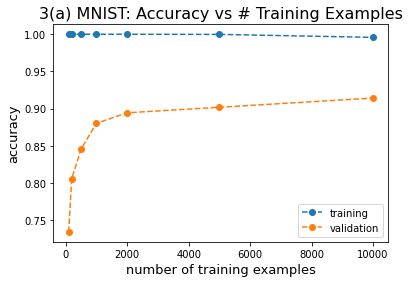

In [13]:
# Plot the accuracy on the training and validation sets versus the number of training 
# examples that you used to train your classifier.
plt.plot(num_training_examples, training_accuracy_list, 'o--', label="training")
plt.plot(num_training_examples, validation_accuracy_list, 'o--', label="validation")
plt.xlabel('number of training examples', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(loc="lower right")
plt.title("3(a) MNIST: Accuracy vs # Training Examples", fontsize=16)
plt.show()

In [13]:
# 3(b) For the spam dataset, use the provided word frquencies as features.
#      Train your model with the following numbers of training examples: 100, 200, 500, 2000, ALL
num_training_examples = [100, 200, 500, 1000, 2000, round(4172*0.8)]
training_accuracy_list = []
validation_accuracy_list = []

for n in num_training_examples: # number of traning examples
  # Train a classifier
  classifier = svm.SVC(kernel='linear', C = 1.0)
  classifier.fit(spam_data["training"][range(0, n)],
                 spam_labels["training"][range(0, n)])
  
  # compute the classifier's accuracy on the training set
  y_true_training = spam_labels["training"][range(0, n)] # int64
  y_pred_training = classifier.predict(spam_data["training"][range(0, n)]) #int64
  training_accuracy = accuracy_score(y_true_training, y_pred_training)
  training_accuracy_list.append(training_accuracy)

  # compute the classifier's accuracy on the validation set
  y_true_validation = spam_labels["validation"] #int64
  y_pred_validation = classifier.predict(spam_data["validation"]) #int64
  validation_accuracy = accuracy_score(y_true_validation, y_pred_validation)
  validation_accuracy_list.append(validation_accuracy)

In [14]:
training_accuracy_list

[0.8, 0.825, 0.802, 0.798, 0.796, 0.799281006590773]

In [15]:
validation_accuracy_list

[0.7709832134292566,
 0.8045563549160671,
 0.8057553956834532,
 0.8093525179856115,
 0.8081534772182254,
 0.815347721822542]

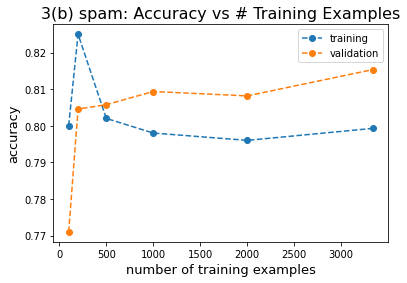

In [16]:
plt.plot(num_training_examples, training_accuracy_list, 'o--', label="training")
plt.plot(num_training_examples, validation_accuracy_list, 'o--', label="validation")
plt.xlabel('number of training examples', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(loc="upper right")
plt.title("3(b) spam: Accuracy vs # Training Examples", fontsize=16)
plt.show()

In [17]:
# 3(c) For the CIFAR-10 dataset, use raw pixels as features.
#      Train your model with the following numbers of training examples: 100, 200, 500, 
#      1000, 2000, 5000
num_training_examples = [100, 200, 500, 1000, 2000, 5000]
training_accuracy_list = []
validation_accuracy_list = []

for n in num_training_examples: # number of traning examples
  # Train a classifier
  classifier = svm.SVC(kernel='linear', C = 1.0)
  classifier.fit(CIFAR10_data["training"][range(0, n)],
                 CIFAR10_labels["training"][range(0, n)])
  
  # compute the classifier's accuracy on the training set
  y_true_training = CIFAR10_labels["training"][range(0, n)] # int64
  y_pred_training = classifier.predict(CIFAR10_data["training"][range(0, n)]) #int64
  training_accuracy = accuracy_score(y_true_training, y_pred_training)
  training_accuracy_list.append(training_accuracy)

  # compute the classifier's accuracy on the validation set
  y_true_validation = CIFAR10_labels["validation"] #int64
  y_pred_validation = classifier.predict(CIFAR10_data["validation"]) #int64
  validation_accuracy = accuracy_score(y_true_validation, y_pred_validation)
  validation_accuracy_list.append(validation_accuracy)

In [18]:
training_accuracy_list

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [19]:
validation_accuracy_list

[0.235, 0.2412, 0.2596, 0.2746, 0.2952, 0.2948]

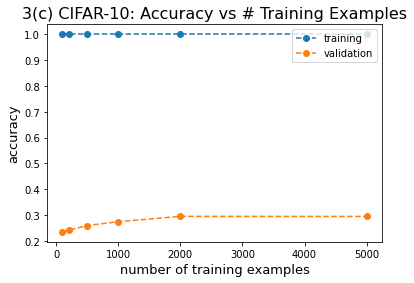

In [20]:
plt.plot(num_training_examples, training_accuracy_list, 'o--', label="training")
plt.plot(num_training_examples, validation_accuracy_list, 'o--', label="validation")
plt.xlabel('number of training examples', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(loc="upper right")
plt.title("3(c) CIFAR-10: Accuracy vs # Training Examples", fontsize=16)
plt.show()

In [22]:
# 4 Hyperparameter Tuning
# For the MNIST dataset, try at least eight C values and find the C value that yields the highest accuracy

row_vec_data_training = MNIST_data["training"].reshape(50000, 28*28) #dtype=float32
row_vec_data_validation = MNIST_data["validation"].reshape(10000, 28*28) #dtype=float32

c_values = [1/1024, 1/256, 1/64, 1/16, 1/4, 1, 4, 16]
validation_accuracy_list = []

for c in c_values: # hyperparameter c
  # Train a classifier
  n = 10000 # number of training examples
  classifier = svm.SVC(kernel='linear', C = c)
  classifier.fit(row_vec_data_training[range(0, n)],
                 MNIST_labels["training"][range(0, n)])

  # compute the classifier's accuracy on the validation set
  y_true_validation = MNIST_labels["validation"] #int64
  y_pred_validation = classifier.predict(row_vec_data_validation) #int64
  validation_accuracy = accuracy_score(y_true_validation, y_pred_validation)
  validation_accuracy_list.append(validation_accuracy)



In [23]:
validation_accuracy_list

[0.8973, 0.9183, 0.9269, 0.9276, 0.9209, 0.9142, 0.9082, 0.9085]

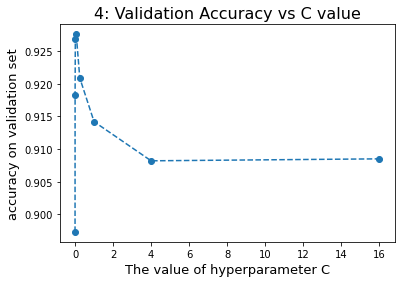

In [24]:
plt.plot(c_values, validation_accuracy_list, 'o--')
plt.xlabel('The value of hyperparameter C', fontsize=13)
plt.ylabel('accuracy on validation set', fontsize=13)
plt.title("4: Validation Accuracy vs C value", fontsize=16)
plt.show()

For the MNIST dataset, I tried $\frac{1}{1024}$, $\frac{1}{256}$, $\frac{1}{64}$, $\frac{1}{16}$, $\frac{1}{4}$, $1$, $4$, $16$ these eight values to find the best $C$ value that yields the highest accuracy on the validation set. Their corresponding accuracy on validation set is $0.9053$,  $0.9223$,  $0.9308$,  $0.9298$,  $0.922$,  $0.9155$,  $0.9115$,  $0.9115$.

$\frac{1}{64}$ (aprroximately $0.16$) is the best $C$ value.

In [25]:
# 5 K-Fold Cross-Vlidation
# For the spam dataset, use 5-fold cross-validation to find and report the best C value

n = 4172  # the total number of training examples
shuffler = np.random.RandomState(seed=7777777).permutation(n)

c_values = [1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32]
avg_acc_for_each_c = []
for c in c_values: # hyperparameter c
  ###
  acc_for_each_fold_list = []
  for a in range(5): # choose each 1/5 as the validation set
    validation_indices = list(range(n//5*a, n//5*(a+1)))
    training_indices = [i for i in range(n) if i not in validation_indices]

    spam_data = {'training': spam["training_data"][shuffler][training_indices], 
                 'validation': spam["training_data"][shuffler][validation_indices]}
    spam_labels = {'training': spam["training_labels"][shuffler][training_indices], 
                   'validation': spam["training_labels"][shuffler][validation_indices]}

    # Train a classifier
    classifier = svm.SVC(kernel='linear', C = c)
    classifier.fit(spam_data["training"],
                   spam_labels["training"])

    # compute the classifier's accuracy on the validation set
    y_true_validation = spam_labels["validation"] #int64
    y_pred_validation = classifier.predict(spam_data["validation"]) #int64
    acc_for_each_fold = accuracy_score(y_true_validation, y_pred_validation)
    acc_for_each_fold_list.append(acc_for_each_fold)
  ###
  avg_acc_for_this_c = np.mean(acc_for_each_fold_list)
  avg_acc_for_each_c.append(avg_acc_for_this_c)

  

In [26]:
avg_acc_for_each_c

[0.746043165467626,
 0.7606714628297363,
 0.7678657074340528,
 0.7772182254196643,
 0.782494004796163,
 0.7894484412470024,
 0.7942446043165468,
 0.7947242206235011,
 0.8002398081534772,
 0.8007194244604315,
 0.8007194244604315,
 0.8033573141486811,
 0.8033573141486811,
 0.8043165467625899,
 0.8043165467625899,
 0.8043165467625899]

In [27]:
[round(_, 4) for _ in avg_acc_for_each_c]

[0.746,
 0.7607,
 0.7679,
 0.7772,
 0.7825,
 0.7894,
 0.7942,
 0.7947,
 0.8002,
 0.8007,
 0.8007,
 0.8034,
 0.8034,
 0.8043,
 0.8043,
 0.8043]

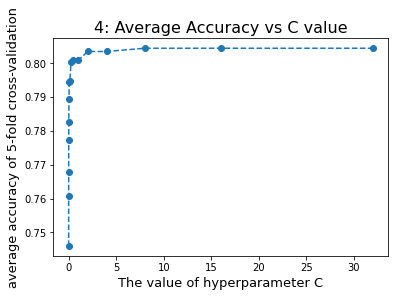

In [28]:
plt.plot(c_values, avg_acc_for_each_c, 'o--')
plt.xlabel('The value of hyperparameter C', fontsize=13)
plt.ylabel('average accuracy of 5-fold cross-validation', fontsize=13)
plt.title("4: Average Accuracy vs C value", fontsize=16)
plt.show()

For the spam dataset, I tried $\frac{1}{1024}$, $\frac{1}{512}$, $\frac{1}{256}$, $\frac{1}{128}$, $\frac{1}{64}$, $\frac{1}{32}$, $\frac{1}{16}$, $\frac{1}{8}$, $\frac{1}{4}$, $\frac{1}{2}$, $1$, $2$, $4$, $8$, $16$ these sixteen values to find the best $C$ value that yields the highest accuracy on the validation set. Their corresponding accuracy on validation set are shown in the two code cells above the graph.

Among all the C values I tried, $16$ yields the highest average accuracy in 5-fold cross validation and hence is the best $C$ value. 

Due to the randomness, any number that greater than $1$ can be equivalently good value for the hyperparameter $C$. They yield closely enough accuracy (around $0.8$). However, the smaller tha value C has, the faster the training computation is. 

In [28]:
!python save_csv.py

In [29]:
# code copy paste from save_csv.py provided by course staff
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [ ]:
# 6 MNIST
MNIST_classifier = svm.SVC(gamma=0.01, C=0.16)
MNIST_classifier.fit(row_vec_data_training[range(0, 10000)],
                     MNIST_labels["training"][range(0, 10000)])

In [ ]:
y_true_validation = MNIST_labels["validation"] # int64
y_pred_validation = MNIST_classifier.predict(row_vec_data_validation) #int64
accuracy = accuracy_score(y_true_validation, y_pred_validation)
accuracy

In [ ]:
results_to_csv(MNIST_classifier.predict(MNIST["test_data"].reshape(10000, 28*28)))

In [ ]:
!python check.py mnist submission.csv

In [28]:
# 6 spam
spam_clf = svm.SVC(kernel='linear', C = 1)
spam_clf.fit(spam_data["training"][range(round(4172*0.8))],
             spam_labels["training"][range(round(4172*0.8))])

SVC(C=1, kernel='linear')

In [29]:
y_true_validation = spam_labels["validation"] # int64
y_pred_validation = spam_clf.predict(spam_data["validation"]) #int64
accuracy = accuracy_score(y_true_validation, y_pred_validation)
accuracy

0.815347721822542

In [ ]:
results_to_csv(spam_clf.predict(spam["test_data"]))

In [ ]:
!python check.py spam submission.csv

In [ ]:
# 6 CIFAR10
cifar_clf = svm.SVC(kernel='linear', C = 0.01)
cifar_clf.fit(CIFAR10_data["training"][range(0, 5000)],
              CIFAR10_labels["training"][range(0, 5000)])
results_to_csv(cifar_clf.predict(CIFAR10["test_data"]))

In [ ]:
y_true_validation = CIFAR10_labels["validation"]# int64
y_pred_validation = cifar_clf.predict(CIFAR10_data["validation"]) #int64
accuracy = accuracy_score(y_true_validation, y_pred_validation)
accuracy

In [ ]:
!python check.py cifar10 submission.csv